In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

C:\Users\test\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
games=pd.read_csv("gamesdataset.csv", encoding="latin1")

In [3]:
games=games[games.year > 1930] #focus on semi-current games

# More new games were invented after 2000 than in the 20th century

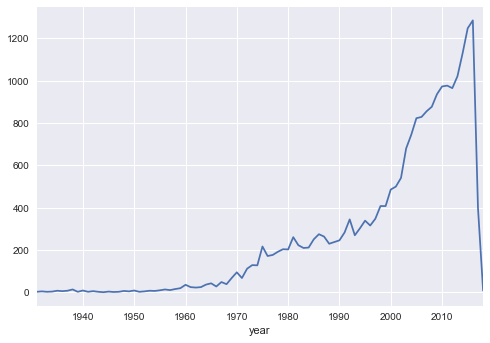

In [5]:
games.groupby("year").size().plot()

In [6]:
twothousands=games[games.year > 2000]
twothousands.year=twothousands.year.astype(int)

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Steadily more games have been produced in the 2000s,  doubling in ten years

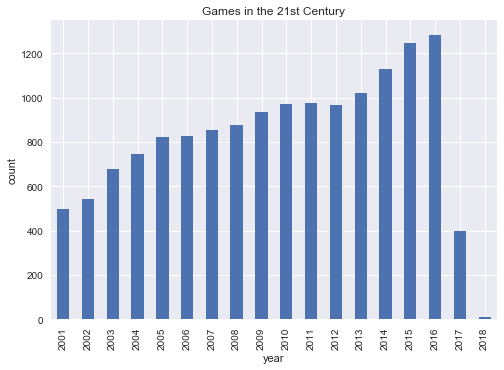

In [7]:
twothousands.groupby("year").size().plot(kind="bar")
plt.title("Games in the 21st Century")
plt.xlabel("year")
plt.ylabel("count")

# Categories, Mechanics, and Publishers

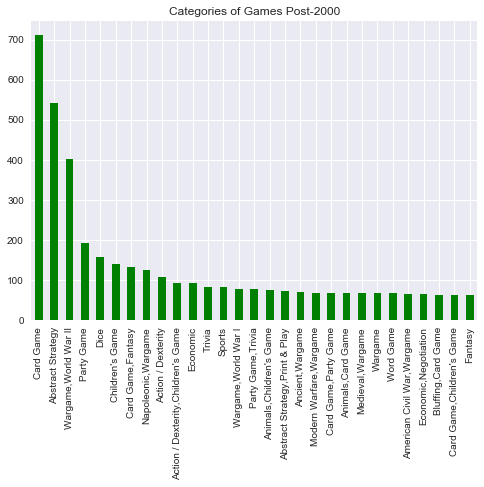

In [42]:
twocats=twothousands.category.value_counts()
twocats=twocats[twocats >60]
twocats.plot(kind="bar", color="g")
plt.title("Categories of Games Post-2000")

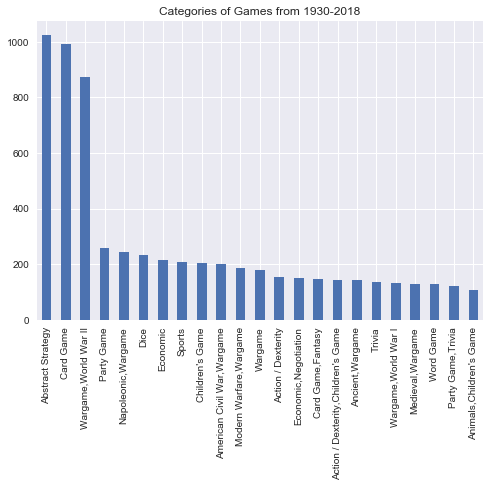

In [43]:
cats=games.category.value_counts()
cats=cats[cats>100]
cats.plot(kind="bar")
plt.title("Categories of Games from 1930-2018")

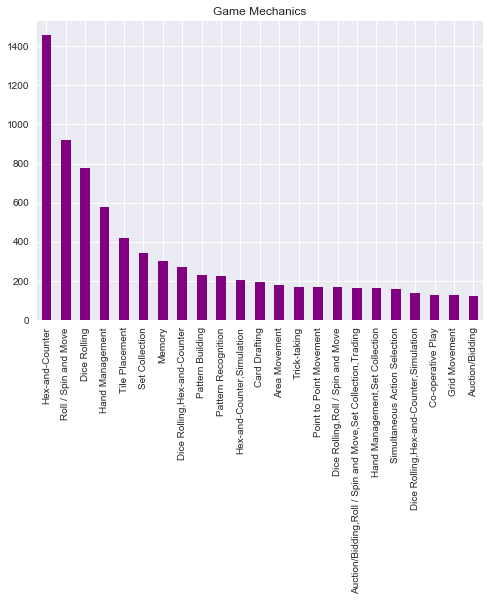

In [46]:
mech=games.mechanic.value_counts()
mech=mech[mech>120]
mech.plot(kind="bar", color="purple")
plt.title("Game Mechanics")

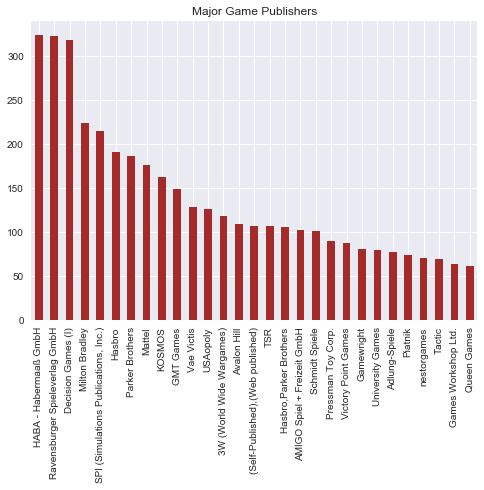

In [48]:
pub=games[games.publisher != "(Self-Published)"]
pub=pub[pub.publisher != "(Web published)"]
pub=pub.publisher.value_counts()
pub=pub[pub > 60]
pub.plot(kind="bar", color="brown")
plt.title("Major Game Publishers")

# Players and Length of Games 

In [12]:
games['avgplayers']=(games["minplayers"]+games["maxplayers"])/2 #creates an average player category

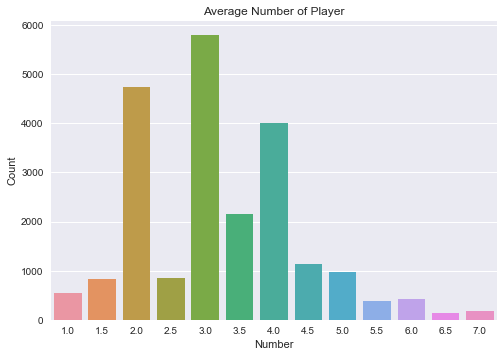

In [49]:
avgplayer=games.avgplayers.value_counts()
avgplayer=avgplayer[avgplayer > 110]
sns.barplot(x=avgplayer.index, y=avgplayer)
plt.title("Average Number of Player")
plt.xlabel("Number")
plt.ylabel("Count")

In [14]:
games["minplaytime"]=pd.to_numeric(games["minplaytime"])
games["maxplaytime"]=pd.to_numeric(games["maxplaytime"])
games=games.replace(0, np.nan)

In [15]:
games['avgplaytime']=(games["minplaytime"]+games["maxplaytime"])/2 #creates average play time category

In [16]:
avgplaytime=games.avgplaytime.value_counts()
longgames=avgplaytime[avgplaytime > 400]
avgplaytime=avgplaytime[avgplaytime < 400]

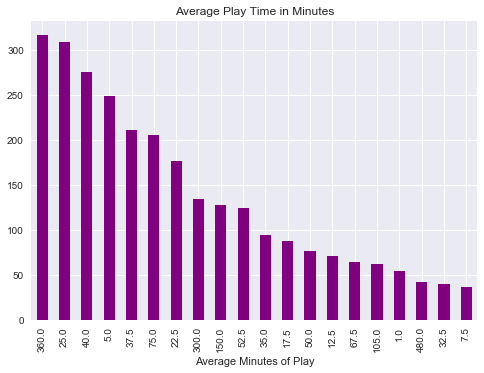

In [52]:
avgplaytime.sort_values(ascending=False).head(20).plot(kind="bar", color='purple')
plt.title("Average Play Time in Minutes")
plt.xlabel("Average Minutes of Play")

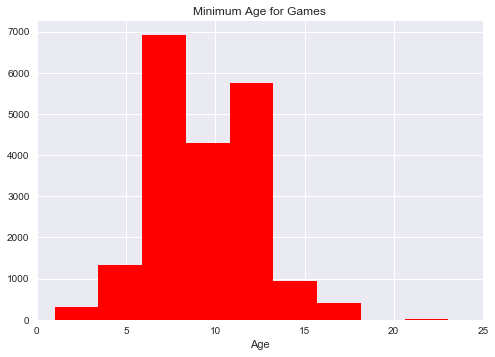

In [56]:
x=games.minage.hist(bins=40, color="r")
x.set_xlim(0,25)
plt.title("Minimum Age for Games")
plt.xlabel("Age")

# Geek Scores and Average Scores

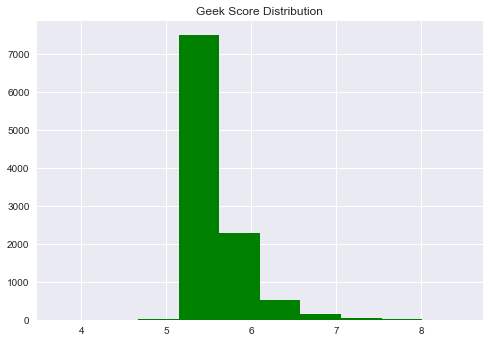

In [53]:
x=games[games.geekscore.notnull()]
geeks=x.geekscore
x.geekscore.hist(color="green")
plt.title("Geek Score Distribution")

Note that the geek score is much lower than the average score

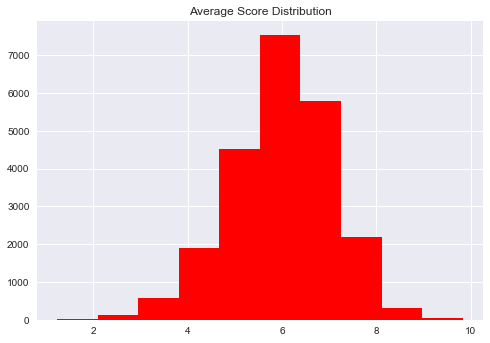

In [54]:
games.average.hist(color="red")
plt.title("Average Score Distribution")

In [55]:
topscores=games[games.geekscore > 7]  #list of the top games, by geekscore
topscores.sort_values(by="geekscore", ascending=False)

,id,description,image,maxplayers,maxplaytime,minage,minplayers,minplaytime,name,playingtime,...,owned,stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,trading,usersrated,wanting,avgplayers,avgplaytime,diff
14749,161936,Pandemic Legacy is a co-operative campaign gam...,//cf.geekdo-images.com/images/pic2452831.png,4.0,60.0,13.0,2.0,60.0,Pandemic Legacy: Season 1,60.0,...,28322.0,1.73529,8.48966,1.0,107.0,17251,646.0,3.0,60.0,0.17912
21118,182028,Through the Ages: A New Story of Civilization ...,//cf.geekdo-images.com/images/pic2663291.jpg,4.0,240.0,14.0,2.0,180.0,Through the Ages: A New Story of Civilization,240.0,...,9337.0,1.46808,8.30554,2.0,50.0,6888,1017.0,3.0,210.0,0.43681
18798,187645,From the publisher:&#10;&#10;Star Wars: Rebell...,//cf.geekdo-images.com/images/pic2737530.png,4.0,240.0,14.0,2.0,180.0,Star Wars: Rebellion,240.0,...,13553.0,1.36380,8.14551,5.0,80.0,8142,1125.0,3.0,210.0,0.39933
8318,174430,Gloomhaven is a game of Euro-inspired tactical...,//cf.geekdo-images.com/images/pic2437871.jpg,4.0,150.0,12.0,1.0,90.0,Gloomhaven,150.0,...,5265.0,1.65144,8.11567,6.0,19.0,3503,702.0,2.5,120.0,1.02098
15876,108687,Puerto Rico: Anniversary Edition is a tenth an...,//cf.geekdo-images.com/images/pic1188353.jpg,5.0,150.0,13.0,2.0,90.0,Puerto Rico: Limited Anniversary Edition,150.0,...,4504.0,1.66999,7.83905,NaN,29.0,3369,363.0,3.5,120.0,0.67791
12474,209010,Mechs vs. Minions is a cooperative tabletop ca...,//cf.geekdo-images.com/images/pic3184103.jpg,4.0,90.0,14.0,2.0,60.0,Mechs vs. Minions,90.0,...,7841.0,1.29627,7.82479,23.0,50.0,4602,786.0,3.0,75.0,0.55069
7598,175914,&quot;Lemonade? They want lemonade? What is th...,//cf.geekdo-images.com/images/pic2649434.png,5.0,240.0,14.0,2.0,120.0,Food Chain Magnate,240.0,...,6553.0,1.47662,7.81262,25.0,61.0,4965,1015.0,3.5,180.0,0.46946
21156,160069,Ticket to Ride: 10th Anniversary contains mate...,//cf.geekdo-images.com/images/pic1927856.jpg,5.0,60.0,8.0,2.0,30.0,Ticket to Ride: 10th Anniversary,60.0,...,7616.0,1.11879,7.70662,NaN,32.0,3625,205.0,3.5,45.0,0.62081
14899,163412,"In Patchwork, two players compete to build the...",//cf.geekdo-images.com/images/pic2270442.jpg,2.0,30.0,8.0,2.0,15.0,Patchwork,30.0,...,27463.0,1.07883,7.69632,43.0,164.0,18379,751.0,2.0,22.5,0.13532
5915,62219,"Game Overview&#10;90,000 B.C. &mdash; A great ...",//cf.geekdo-images.com/images/pic784193.jpg,6.0,240.0,14.0,2.0,120.0,Dominant Species,240.0,...,13720.0,1.50292,7.68917,44.0,285.0,12918,1173.0,4.0,180.0,0.17656


# Stats on the Ownership and the Popularity of a Game

In [21]:
games.columns
owned=games[games.owned.notnull()]

In [22]:
owned["desirequotient"]=owned.wanting/owned.owned #creates a desirequotient, the relationship between the number of people that own a game and the number of people that want the game
owned[["name", "desirequotient", 'wanting', 'owned']].sort_values(by="desirequotient",ascending=False).head() #the most desired games

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,desirequotient,wanting,owned
7694,Founders of Gloomhaven,56.000000,56.0,1.0
21578,Transatlantic,49.500000,99.0,2.0
4242,CO? (second edition),40.666667,122.0,3.0
943,Alien Artifacts,35.333333,106.0,3.0
3999,Chronicles 1: Origins,32.000000,96.0,3.0


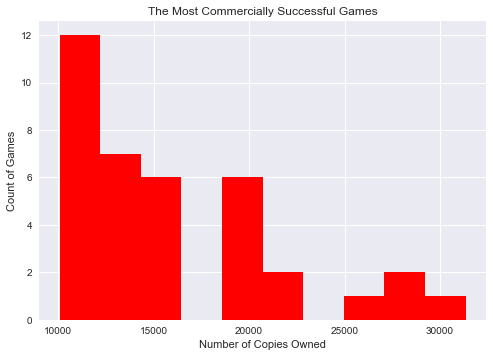

In [58]:
games["owned"]=pd.to_numeric(games["owned"])
successful=games[games["owned"] > 10000]  #the most commerically successful games in the database
plt.hist(successful.owned, color="red")
plt.title("The Most Commercially Successful Games")
plt.xlabel("Number of Copies Owned")
plt.ylabel("Count of Games")

In the next few cells, I try to look at the relationship between games that are owned and their geekscore. My theory is that the most commonly owned games often have lower geekscores. I juxtapose this with the much more highly rated scores of the games in the wanting category. This is just a summary stab at the issue, but I'll return to it in more detail later in the project.

In [25]:
successful[["owned", "name", "geekscore"]].sort_values("owned").head(50)

,owned,name,geekscore
12982,10071.0,Monopoly Deal Card Game,6.08774
7028,10297.0,Fairy Tale,6.63591
12719,10578.0,Mille Bornes,5.59324
21119,10588.0,Through the Desert,6.91168
11543,10753.0,Libertalia,7.08497
7903,10773.0,Fury of Dracula (third edition),7.29054
11185,11123.0,Labyrinth,6.21376
21571,11411.0,Trajan,7.59432
10226,11411.0,Jenga,5.51225
17602,11757.0,SET,6.32546


In [26]:
games["wanting"]=pd.to_numeric(games["wanting"])
desired=(games[games["wanting"] > 500])
desired[["wanting", "name", "geekscore"]].sort_values("wanting", ascending=False).head(50)

,wanting,name,geekscore
5915,1173.0,Dominant Species,7.68917
18798,1125.0,Star Wars: Rebellion,8.14551
486,1097.0,A Feast for Odin,7.67735
21118,1017.0,Through the Ages: A New Story of Civilization,8.30554
7598,1015.0,Food Chain Magnate,7.81262
10172,913.0,Jaipur,7.41947
21571,889.0,Trajan,7.59432
16114,879.0,Ra,7.35343
8376,864.0,Goa,7.44911
9905,804.0,Inis,7.14839


Average Scores tend to be slightly more positive then Geekscores, normally distributed around 0.5.

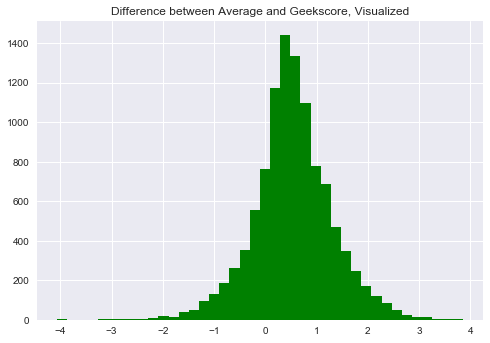

In [27]:
games["diff"]=games['average']-games['geekscore']
games["diff"].hist(bins=40, color="g")
plt.title("Difference between Average and Geekscore, Visualized")

Weight means complexity, and most games are fairly easy, some are mildly complex, although there's a decent market for more complex games

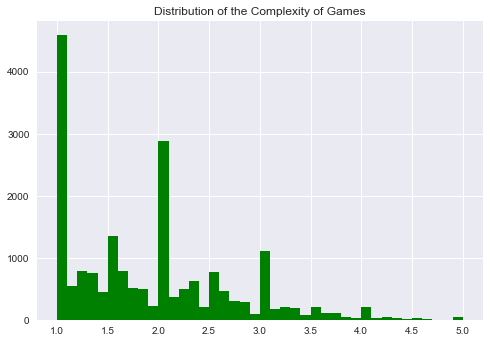

In [28]:
games.weight.hist(bins=40, color="g")
plt.title("Distribution of the Complexity of Games")

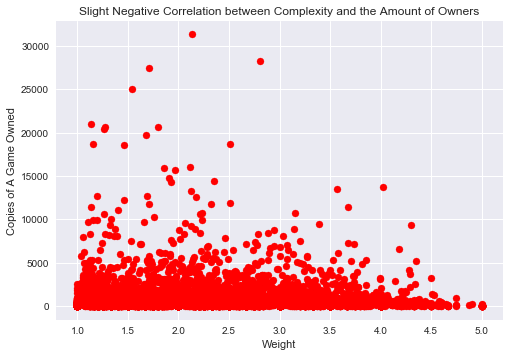

In [29]:
plt.scatter(games.weight, games.owned, color="r")
plt.title("Slight Negative Correlation between Complexity and the Amount of Owners")
plt.xlabel("Weight")
plt.ylabel("Copies of A Game Owned")

Average number of comments is normally distributed, with a peak focused on 7. Ratings lower than 6 and higher than 8 probably come from extreme ratings and small audiences of players (for the most part). Games with lots of comments tend to cluster between 6 and 8.

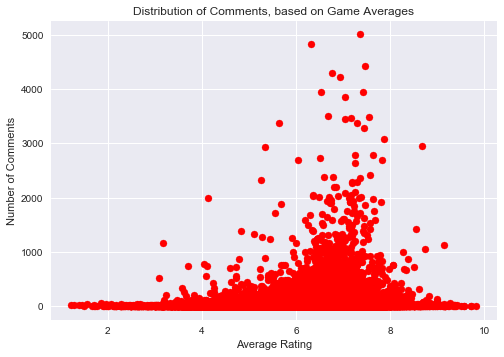

In [30]:
plt.scatter(games.average, games.numcomments, color="r")
plt.title("Distribution of Comments, based on Game Averages")
plt.ylabel("Number of Comments")
plt.xlabel("Average Rating")

For the geekscore, which is weighted by Board Game Geek, there is a slight positive correlation between the number of comments and the rating.

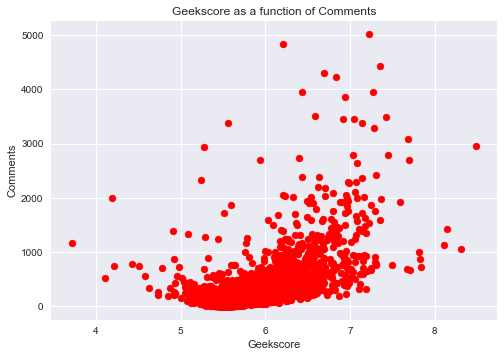

In [31]:
plt.scatter(games.geekscore, games.numcomments, color="R")
plt.title("Geekscore as a function of Comments")
plt.ylabel("Comments")
plt.xlabel("Geekscore")

The Deviation of Ratings from the Mean is Fairly Low (1 or 2)

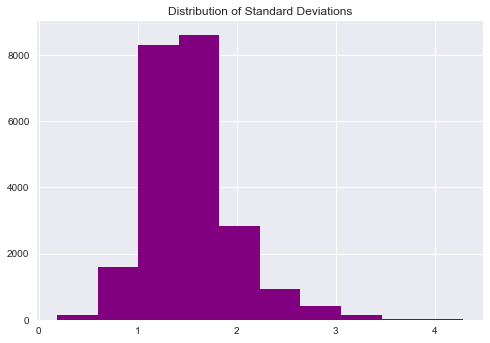

In [60]:
games.stddev.hist(bins=10, color="purple")
plt.title("Distribution of Standard Deviations")

More people owning the game seems to slighty increase the percentage of people that wish to purchase the game

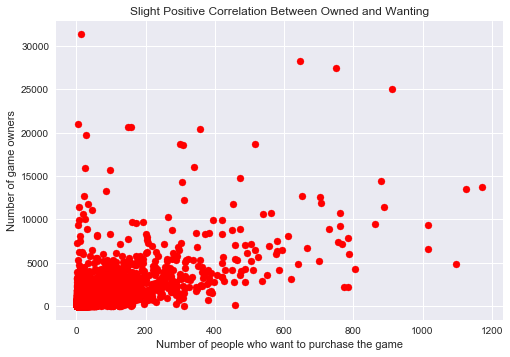

In [33]:
plt.scatter(games.wanting, games.owned, color="r")
plt.title("Slight Positive Correlation Between Owned and Wanting")
plt.xlabel("Number of people who want to purchase the game")
plt.ylabel("Number of game owners")

Slight positive correlation between ownership of a game and those wishing to trade for it

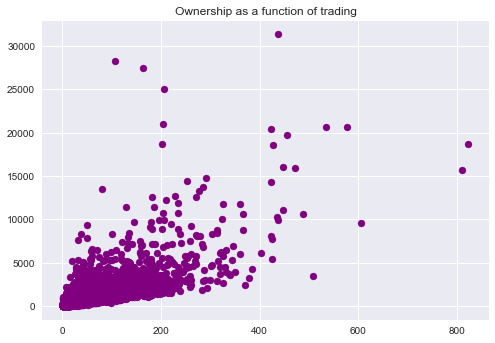

In [62]:
trade=games[games.trading.notnull()]
plt.scatter(trade.trading, trade.owned, color="purple")
plt.title("Ownership as a function of trading")

What games are traded for most?

In [37]:
trade[["name", "trading"]].sort_values(by="trading",ascending=False).head(20) 

,name,trading
623,Acquire,823.0
17400,Scotland Yard,810.0
16372,Red November,605.0
2682,Blokus,577.0
8749,Guillotine,534.0
2185,Battleball,508.0
12719,Mille Bornes,488.0
19037,Stratego,472.0
4189,Clue,455.0
11185,Labyrinth,447.0


# Conclusion

#Gaming changed dramatically in the 2000s. Part of the goal of future analysis will be to show how, and provide some answers as to why.
#Later work will also try to knit together some of the different threads here, namely the connection between mechanic/category, player size and time, and popularity (measured both by critical reception and by later reception of the work).
#I am also interested in trying to paint a more segmented picture of the various gaming markets and think about how they relate to broader gaming publics. 
#My operating assumption here as well is that conventional games (i.e. Monopoly, Clue, etc.) are far more widespread than most other games in this list, and this is something I'd like to test.
#I'd also like to integrate price data into this dataset, as it might say something about profitability for a game manufacturer.
#In short, I've found a few areas of potential to review, although there's no clear or straightforward story to draw from the data at the moment.